In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [39]:
df = pd.read_csv("urban_heat_island_dataset.csv")
df

,City Name,Latitude,Longitude,Elevation (m),Temperature (°C),Land Cover,Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),GDP per Capita (USD)
0,City_1,-22.582779,71.338217,833.098180,22.977045,Water,2544,7160.489181,158,50.451182,14.471976,15.542325,63.668679,1799.112014,7228.414052
1,City_2,81.128575,12.994692,2438.554263,21.979547,Green Space,7868,37117.730971,84,17.346096,23.384061,6.419840,47.680935,2235.999184,21949.550913
2,City_3,41.758910,-68.570058,3928.256261,10.641052,Green Space,4016,48754.998755,32,27.132257,30.969498,8.498532,66.667426,2156.371739,8882.154381
3,City_4,17.758527,112.966207,3295.011989,18.531196,Green Space,9750,3557.732823,195,53.232946,20.559524,12.009385,64.935183,1752.109418,35317.046554
4,City_5,-61.916645,66.503222,3629.525165,19.504890,Water,9668,34427.500151,150,17.746266,21.374323,24.355984,64.098767,650.557433,38184.538586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,City_496,-26.396599,-147.030454,3006.957593,26.423879,Urban,8853,29921.400298,154,58.863997,21.324987,18.515827,45.820619,1927.320566,33796.455402
496,City_497,15.058100,150.232887,2787.706557,33.915366,Green Space,4476,20974.010041,42,49.690905,30.771039,29.094566,75.085102,2247.356069,44525.337629
497,City_498,-76.007765,-130.745293,2085.723197,11.723950,Water,2251,24006.751560,65,42.971148,4.078746,21.828934,61.127570,753.603598,23537.155613
498,City_499,85.391065,162.085447,1709.036011,11.426368,Urban,9467,2387.252446,130,38.890353,4.389412,27.678113,58.690440,2233.191377,30741.682697


In [40]:
df.isnull().sum()

City Name                              0
Latitude                               0
Longitude                              0
Elevation (m)                          0
Temperature (°C)                       0
Land Cover                             0
Population Density (people/km²)        0
Energy Consumption (kWh)               0
Air Quality Index (AQI)                0
Urban Greenness Ratio (%)              0
Health Impact (Mortality Rate/100k)    0
Wind Speed (km/h)                      0
Humidity (%)                           0
Annual Rainfall (mm)                   0
GDP per Capita (USD)                   0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City Name                            500 non-null    object 
 1   Latitude                             500 non-null    float64
 2   Longitude                            500 non-null    float64
 3   Elevation (m)                        500 non-null    float64
 4   Temperature (°C)                     500 non-null    float64
 5   Land Cover                           500 non-null    object 
 6   Population Density (people/km²)      500 non-null    int64  
 7   Energy Consumption (kWh)             500 non-null    float64
 8   Air Quality Index (AQI)              500 non-null    int64  
 9   Urban Greenness Ratio (%)            500 non-null    float64
 10  Health Impact (Mortality Rate/100k)  500 non-null    float64
 11  Wind Speed (km/h)               

In [42]:
df.describe()

,Latitude,Longitude,Elevation (m),Temperature (°C),Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),GDP per Capita (USD)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.258892,-6.497498,2329.011548,22.411912,5226.498000,26154.677545,117.766000,34.366339,24.115900,15.197707,59.606326,1511.755037,25220.779913
std,53.763914,102.777644,1337.368198,7.175246,2694.451156,14014.519743,48.673499,14.339893,14.057905,8.730113,11.367910,591.143902,14266.702711
min,-89.088915,-178.332472,22.229914,10.080457,506.000000,1021.696290,30.000000,10.032670,0.001536,0.006811,40.247353,514.183626,1192.000373
25%,-46.569656,-97.524271,1085.526218,16.026857,2776.750000,14088.305304,77.000000,21.867112,11.806410,7.490328,50.413401,976.856758,12924.791664
50%,2.369475,-10.144236,2428.822512,22.722283,5269.500000,26835.197121,117.000000,33.324813,24.952223,14.895228,58.997547,1536.380812,25130.312995
75%,46.102479,81.481255,3498.046911,28.434406,7480.000000,38369.323459,161.000000,47.189876,34.606325,22.913989,68.883888,2024.375038,38066.749917
max,88.733663,179.898362,4497.361766,34.958688,9996.000000,49977.652017,199.000000,59.977885,49.887469,29.908483,79.951717,2498.700601,49973.573372


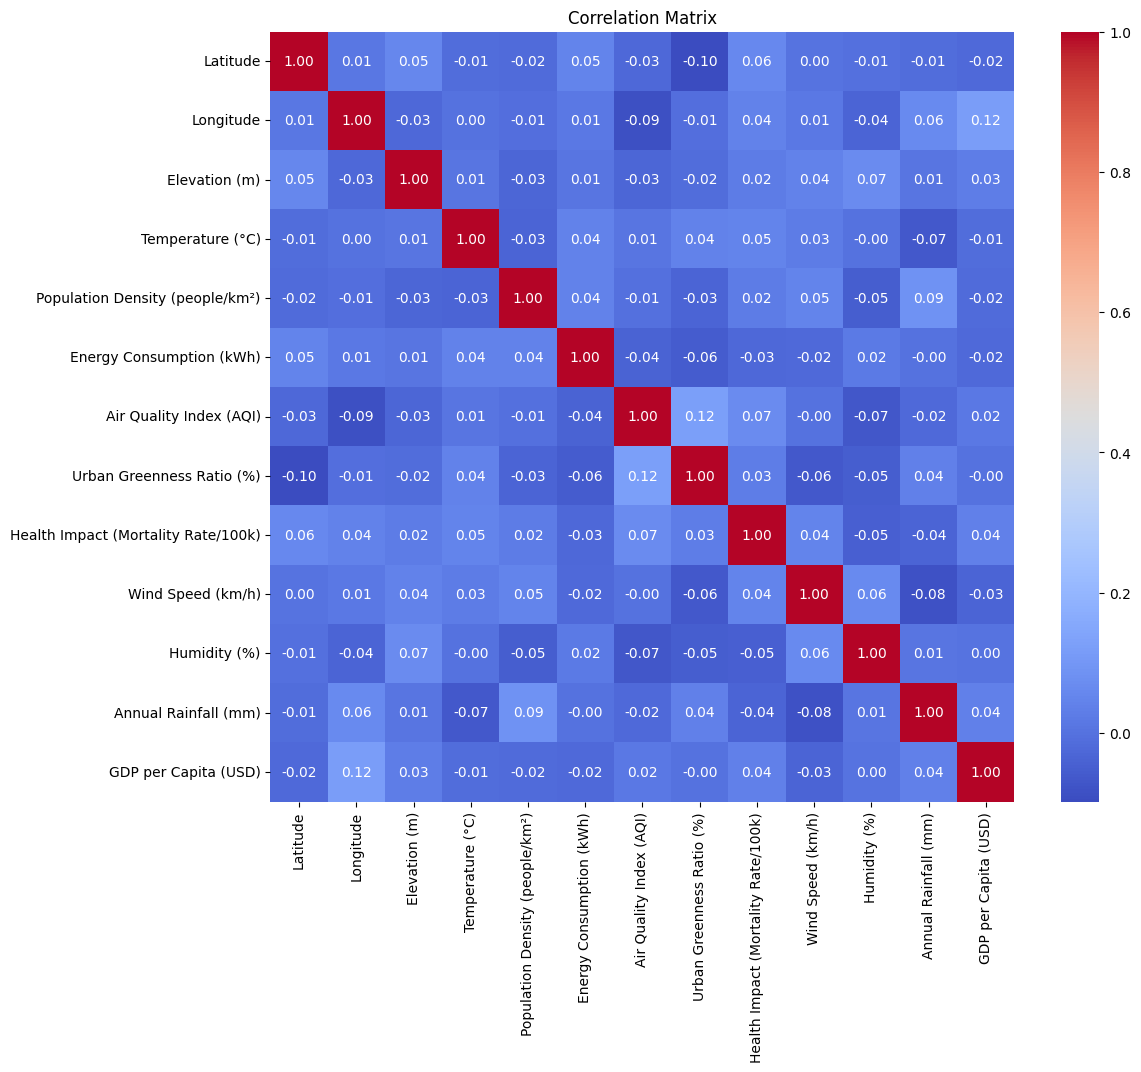

In [43]:
# --- 1. Correlation Matrix ---
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

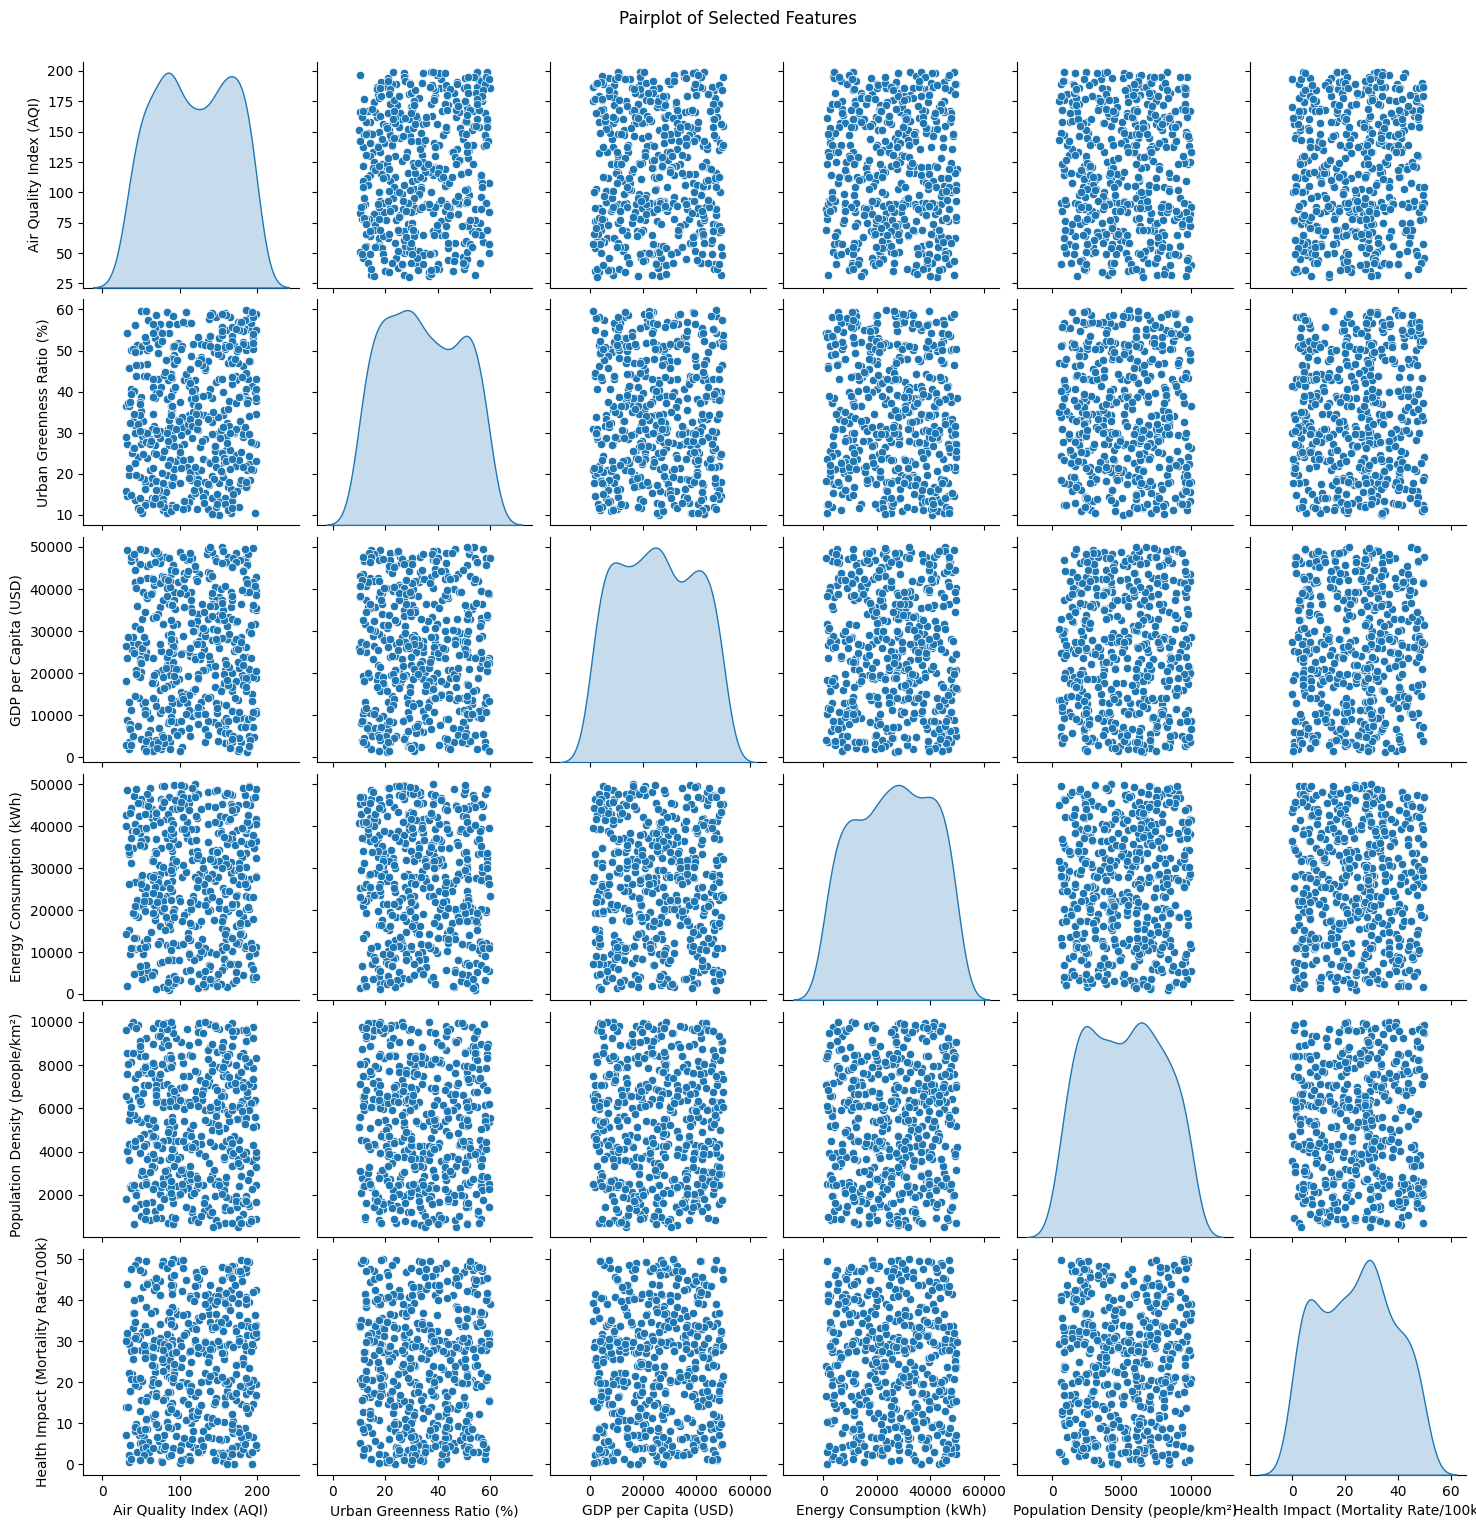

In [44]:
# --- 2. Pairplot: Key Features vs Health Impact ---
selected_features = ['Air Quality Index (AQI)', 'Urban Greenness Ratio (%)', 'GDP per Capita (USD)',
                     'Energy Consumption (kWh)', 'Population Density (people/km²)',
                     'Health Impact (Mortality Rate/100k)']

sns.pairplot(df[selected_features], diag_kind = 'kde')
plt.suptitle("Pairplot of Selected Features", y = 1.02)
plt.show()

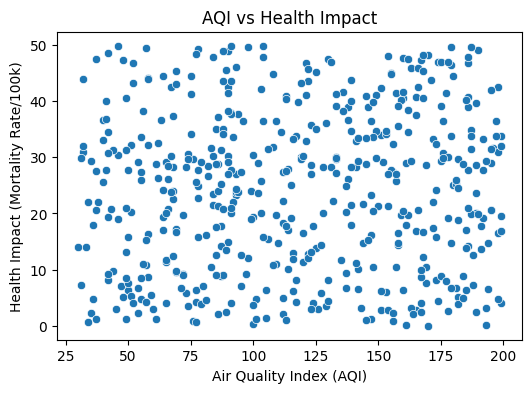

In [45]:
# --- 3. Scatter Plots ---

# AQI vs Mortality
plt.figure(figsize = (6, 4))
sns.scatterplot(data = df, x ='Air Quality Index (AQI)', y = 'Health Impact (Mortality Rate/100k)')
plt.title("AQI vs Health Impact")
plt.show()

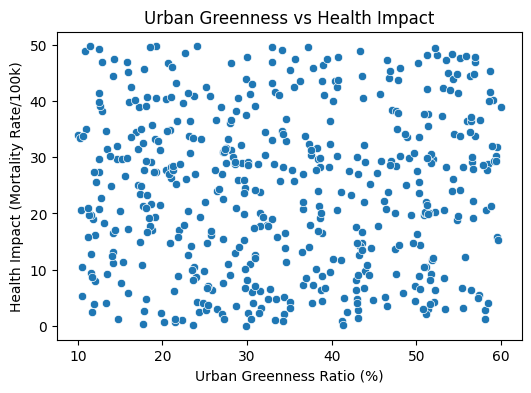

In [46]:
# Greenness vs Mortality
plt.figure(figsize = (6, 4))
sns.scatterplot(data = df, x = 'Urban Greenness Ratio (%)', y = 'Health Impact (Mortality Rate/100k)')
plt.title("Urban Greenness vs Health Impact")
plt.show()

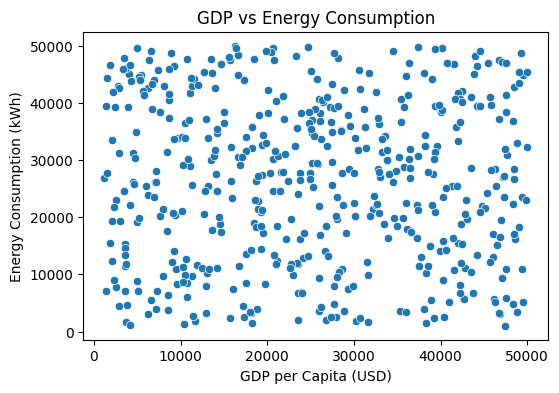

In [47]:
# GDP vs Energy Use
plt.figure(figsize = (6, 4))
sns.scatterplot(data = df, x = 'GDP per Capita (USD)', y = 'Energy Consumption (kWh)')
plt.title("GDP vs Energy Consumption")
plt.show()

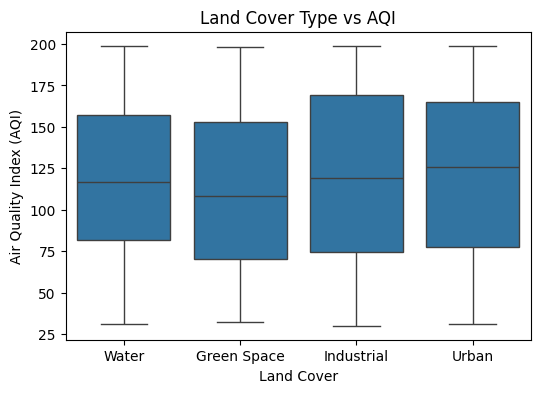

In [48]:
# --- 4. Boxplot: Land Cover vs AQI ---
plt.figure(figsize = (6, 4))
sns.boxplot(data = df, x = 'Land Cover', y = 'Air Quality Index (AQI)')
plt.title("Land Cover Type vs AQI")
plt.show()

In [49]:
df.head()

,City Name,Latitude,Longitude,Elevation (m),Temperature (°C),Land Cover,Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),GDP per Capita (USD)
0,City_1,-22.582779,71.338217,833.098180,22.977045,Water,2544,7160.489181,158,50.451182,14.471976,15.542325,63.668679,1799.112014,7228.414052
1,City_2,81.128575,12.994692,2438.554263,21.979547,Green Space,7868,37117.730971,84,17.346096,23.384061,6.419840,47.680935,2235.999184,21949.550913
2,City_3,41.758910,-68.570058,3928.256261,10.641052,Green Space,4016,48754.998755,32,27.132257,30.969498,8.498532,66.667426,2156.371739,8882.154381
3,City_4,17.758527,112.966207,3295.011989,18.531196,Green Space,9750,3557.732823,195,53.232946,20.559524,12.009385,64.935183,1752.109418,35317.046554
4,City_5,-61.916645,66.503222,3629.525165,19.504890,Water,9668,34427.500151,150,17.746266,21.374323,24.355984,64.098767,650.557433,38184.538586


In [50]:
X = df[['Health Impact (Mortality Rate/100k)']]
y = df.drop(columns = ['City Name', 'Land Cover', 'Health Impact (Mortality Rate/100k)'])
X,y


(     Health Impact (Mortality Rate/100k)
 0                              14.471976
 1                              23.384061
 2                              30.969498
 3                              20.559524
 4                              21.374323
 ..                                   ...
 495                            21.324987
 496                            30.771039
 497                             4.078746
 498                             4.389412
 499                             8.591473
 
 [500 rows x 1 columns],
       Latitude   Longitude  Elevation (m)  Temperature (°C)  \
 0   -22.582779   71.338217     833.098180         22.977045   
 1    81.128575   12.994692    2438.554263         21.979547   
 2    41.758910  -68.570058    3928.256261         10.641052   
 3    17.758527  112.966207    3295.011989         18.531196   
 4   -61.916645   66.503222    3629.525165         19.504890   
 ..         ...         ...            ...               ...   
 495 -26.396599 -147.

In [51]:
# Split data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [52]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model

RandomForestRegressor(random_state=42)

In [53]:
model.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [54]:
# Predict & Evaluate
y_pred = model.predict(Xtest)
print("R² Score:", r2_score(ytest, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(ytest, y_pred)))

R² Score: -0.49632696703459706
RMSE: 7439.013376967989


In [94]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [95]:


df_cleaned = df.drop(columns=['City Name'])


categorical_cols = ['Land Cover']
numerical_cols = [col for col in df_cleaned.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

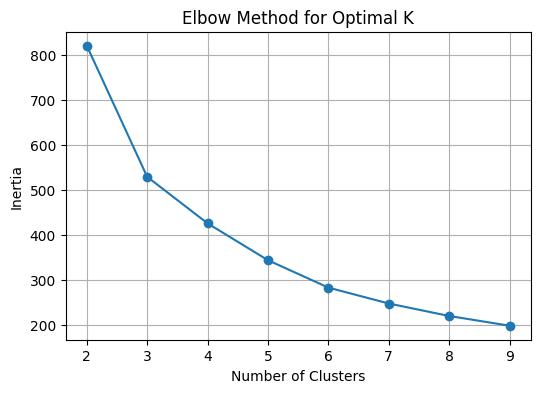

In [96]:
X_encoded = preprocessor.fit_transform(df_cleaned)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [97]:

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


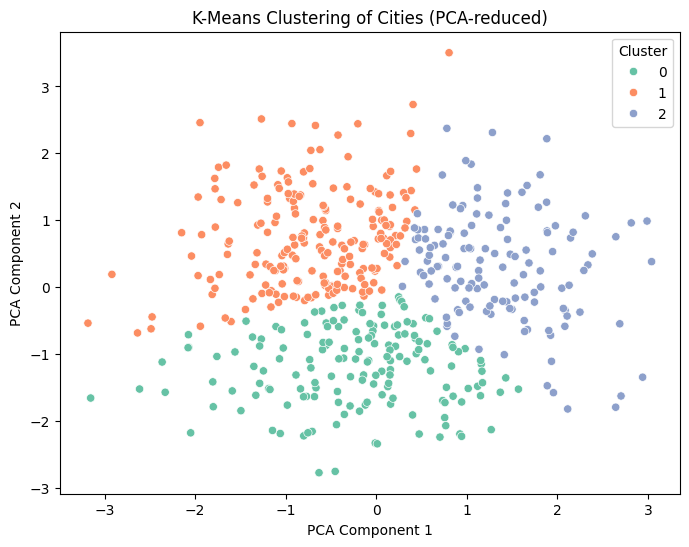

In [93]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("K-Means Clustering of Cities (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()


In [100]:
cluster_summary = df.groupby('kmeans_cluster').mean()
print(cluster_summary)


KeyError: 'kmeans_cluster'